# Kodluyoruz Veri Bilimi Bootcamp - EDA


İstatistikte, keşifsel veri analizi (exploratory data analysis; EDA), genellikle istatistiksel grafikler ve diğer veri görselleştirme yöntemlerini kullanarak temel özelliklerini **özetlemek** için **veri kümelerini analiz etme** yaklaşımıdır.

EDA'in amaçları şunlardır:

*   Gözlenen fenomenin nedenleri hakkında hipotezler önermek.
*   İstatistiksel çıkarımın dayandırılacağı varsayımları değerlendirmek.
*   Uygun istatistiksel araç ve tekniklerin seçimini desteklemek.
*   Anketler veya deneyler yoluyla daha fazla veri toplanması için bir temel sağlamak.


Mesela elimizde bir veri olduğunu düşünelim. Bu veride öğrencilerin bazı derslerden aldığı notlar var. 

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv')

In [ ]:
dataset.head()

gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]

Acaba notları tahmin edebilir miyiz? Bir varsayım yapalım,

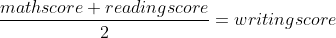

In [ ]:
((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score']

0     -2.0
1     -8.5
2     -0.5
3      8.0
4      2.0
      ... 
995   -1.5
996    3.5
997    0.0
998   -4.0
999   -4.5
Length: 1000, dtype: float64

En fazla bu kadar puan fark oluyor:

In [ ]:
max(((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score'])

16.5

Ortalama bu kadar uzak tahmin etmişiz

In [ ]:
sum(abs(((dataset['math score'] + dataset['reading score']) / 2) - dataset['writing score'])) / 1000

4.888

Verimiz üzerinde daha fazla öngörüye sahip olmak için incelemeye devam edebiliriz.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
dataset.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Verimiz daha gerçekçi olsun diye rastgele NaN'lar ekleyeceğim.

In [ ]:
dataset.mask(np.random.random(dataset.shape) < .1)

gender race/ethnicity  ... reading score writing score
0    female        group B  ...          72.0          74.0
1    female        group C  ...           NaN          88.0
2    female        group B  ...          95.0          93.0
3      male        group A  ...           NaN          44.0
4      male        group C  ...           NaN          75.0
..      ...            ...  ...           ...           ...
995     NaN        group E  ...          99.0          95.0
996    male        group C  ...          55.0          55.0
997  female        group C  ...          71.0          65.0
998  female        group D  ...          78.0          77.0
999  female        group D  ...          86.0          86.0

[1000 rows x 8 columns]

In [ ]:
normal_dataset = dataset.mask(np.random.random(dataset.shape) < .1)

In [ ]:
normal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       904 non-null    object 
 1   race/ethnicity               897 non-null    object 
 2   parental level of education  909 non-null    object 
 3   lunch                        888 non-null    object 
 4   test preparation course      897 non-null    object 
 5   math score                   893 non-null    float64
 6   reading score                892 non-null    float64
 7   writing score                886 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
normal_dataset.describe()

math score  reading score  writing score
count  893.000000     892.000000     886.000000
mean    66.013438      69.253363      68.129797
std     15.287669      14.703838      15.040363
min      0.000000      17.000000      15.000000
25%     56.000000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000

In [ ]:
normal_dataset.describe(include='all')

gender race/ethnicity  ... reading score writing score
count      904            897  ...    892.000000    886.000000
unique       2              5  ...           NaN           NaN
top     female        group C  ...           NaN           NaN
freq       469            289  ...           NaN           NaN
mean       NaN            NaN  ...     69.253363     68.129797
std        NaN            NaN  ...     14.703838     15.040363
min        NaN            NaN  ...     17.000000     15.000000
25%        NaN            NaN  ...     59.000000     58.000000
50%        NaN            NaN  ...     70.000000     69.000000
75%        NaN            NaN  ...     80.000000     79.000000
max        NaN            NaN  ...    100.000000    100.000000

[11 rows x 8 columns]

In [ ]:
normal_dataset['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', nan, 'group E'],
      dtype=object)

Dataset temizlemek bir sütun çıkartmak değildir. 

*   NaN'ları silmek
*   NaN'lara ortalama değerler atamak
*   Outlier'ları silmek
*   Tekrar eden verileri silmek

ve benzeri işlemler temizlemek olarak sayılabilir. Şimdilik onları tüm veri üzerine yapmak yerine ilerledikçe ortaya çıkan data frame'ler üzerinde yapacağız.

Bazı önemli fonksiyonlar:

*   NaN değerleri doldur -> fillna
*   Tekrar eden satırları sil -> drop_duplicates
*   Tip değişikliği yap -> astype  

In [ ]:
normal_dataset.drop(['race/ethnicity', 'gender'], axis=1)

parental level of education         lunch  ... reading score  writing score
0             bachelor's degree      standard  ...           NaN           74.0
1                  some college      standard  ...          90.0            NaN
2               master's degree      standard  ...          95.0            NaN
3            associate's degree  free/reduced  ...          57.0           44.0
4                  some college      standard  ...           NaN           75.0
..                          ...           ...  ...           ...            ...
995             master's degree      standard  ...          99.0           95.0
996                 high school  free/reduced  ...          55.0            NaN
997                 high school  free/reduced  ...          71.0           65.0
998                         NaN      standard  ...          78.0           77.0
999                some college  free/reduced  ...           NaN           86.0

[1000 rows x 6 columns]

In [ ]:
cleaned_dataset = normal_dataset.drop(['race/ethnicity', 'gender'], axis=1)

Başka bir analiz yapıp kursa katılmanın notlar üzerindeki etkisine bakalım.

In [ ]:
cleaned_dataset['test preparation course'].notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997     True
998    False
999     True
Name: test preparation course, Length: 1000, dtype: bool

In [ ]:
course_notnull = cleaned_dataset['test preparation course'].notnull()

In [ ]:
cleaned_dataset[course_notnull].reset_index()

index parental level of education  ... reading score writing score
0        0           bachelor's degree  ...           NaN          74.0
1        1                some college  ...          90.0           NaN
2        2             master's degree  ...          95.0           NaN
3        3          associate's degree  ...          57.0          44.0
4        4                some college  ...           NaN          75.0
..     ...                         ...  ...           ...           ...
892    994                 high school  ...          63.0          62.0
893    995             master's degree  ...          99.0          95.0
894    996                 high school  ...          55.0           NaN
895    997                 high school  ...          71.0          65.0
896    999                some college  ...           NaN          86.0

[897 rows x 7 columns]

In [ ]:
course = cleaned_dataset[course_notnull].reset_index().drop(['index'], axis=1)

In [ ]:
course

parental level of education         lunch  ... reading score  writing score
0             bachelor's degree      standard  ...           NaN           74.0
1                  some college      standard  ...          90.0            NaN
2               master's degree      standard  ...          95.0            NaN
3            associate's degree  free/reduced  ...          57.0           44.0
4                  some college      standard  ...           NaN           75.0
..                          ...           ...  ...           ...            ...
892                 high school      standard  ...          63.0           62.0
893             master's degree      standard  ...          99.0           95.0
894                 high school  free/reduced  ...          55.0            NaN
895                 high school  free/reduced  ...          71.0           65.0
896                some college  free/reduced  ...           NaN           86.0

[897 rows x 6 columns]

loc label'a göre çalışıyor, istediğiniz aralığı verip erişebilirsiniz fakat istediğiniz sütun başlıklarını da vermelisiniz. Sütunları da index ile vermek istiyorsanız iloc kullanabilirsiniz.

In [ ]:
course.loc[:, ['test preparation course', 'math score', 'reading score', 'writing score']]

test preparation course  math score  reading score  writing score
0                      none        72.0            NaN           74.0
1                 completed        69.0           90.0            NaN
2                      none         NaN           95.0            NaN
3                      none        47.0           57.0           44.0
4                      none         NaN            NaN           75.0
..                      ...         ...            ...            ...
892                    none        63.0           63.0           62.0
893               completed        88.0           99.0           95.0
894                    none         NaN           55.0            NaN
895               completed        59.0           71.0           65.0
896                    none        77.0            NaN           86.0

[897 rows x 4 columns]

In [ ]:
course = course.loc[:, ['test preparation course', 'math score', 'reading score', 'writing score']]

In [ ]:
course.describe()

math score  reading score  writing score
count  798.000000     798.000000     802.000000
mean    66.077694      69.182957      68.163342
std     15.061696      14.584126      15.096014
min      8.000000      23.000000      15.000000
25%     56.250000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      79.750000      79.000000
max    100.000000     100.000000     100.000000

In [ ]:
course['reading score'].fillna(69.18)

0      69.18
1      90.00
2      95.00
3      57.00
4      69.18
       ...  
892    63.00
893    99.00
894    55.00
895    71.00
896    69.18
Name: reading score, Length: 897, dtype: float64

In [ ]:
course['math score'] = course['math score'].fillna(66.07)
course['reading score'] = course['reading score'].fillna(69.18)
course['writing score'] = course['writing score'].fillna(68.16)

Aşağıda gördüğümüz gibi hepsinin count değerleri eşit ve mean değerleri değişmedi.

In [ ]:
course.describe()

math score  reading score  writing score
count  897.000000     897.000000     897.000000
mean    66.076845      69.182631      68.162988
std     14.205255      13.754840      14.273305
min      8.000000      23.000000      15.000000
25%     58.000000      60.000000      60.000000
50%     66.070000      69.180000      68.160000
75%     75.000000      78.000000      77.000000
max    100.000000     100.000000     100.000000

In [ ]:
course['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
course['test preparation course'] == 'completed'

0      False
1       True
2      False
3      False
4      False
       ...  
892    False
893     True
894    False
895     True
896    False
Name: test preparation course, Length: 897, dtype: bool

In [ ]:
completed_filter = course['test preparation course'] == 'completed'

In [ ]:
not_completed_filter = ~completed_filter

In [ ]:
course[completed_filter]['math score'] + course[completed_filter]['reading score'] + course[completed_filter]['writing score']

1      227.16
6      275.00
8      196.16
13     220.00
18     134.00
        ...  
886    232.00
888    235.16
889    225.00
893    282.00
895    195.00
Length: 322, dtype: float64

In [ ]:
total_comp_score = course[completed_filter]['math score'] + course[completed_filter]['reading score'] + course[completed_filter]['writing score']

In [ ]:
sum(total_comp_score)

69689.15000000005

In [ ]:
total_not_comp_score = course[not_completed_filter]['math score'] + course[not_completed_filter]['reading score'] + course[not_completed_filter]['writing score']

In [ ]:
sum(total_not_comp_score)

112780.80000000008

In [ ]:
sum(total_comp_score) / total_comp_score.size / 3

72.14197722567293

In [ ]:
sum(total_not_comp_score) / total_not_comp_score.size / 3

65.38017391304352

In [ ]:
scores = ['math score', 'reading score', 'writing score']
course[scores]

math score  reading score  writing score
0         72.00          69.18          74.00
1         69.00          90.00          68.16
2         66.07          95.00          68.16
3         47.00          57.00          44.00
4         66.07          69.18          75.00
..          ...            ...            ...
892       63.00          63.00          62.00
893       88.00          99.00          95.00
894       66.07          55.00          68.16
895       59.00          71.00          65.00
896       77.00          69.18          86.00

[897 rows x 3 columns]

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv')

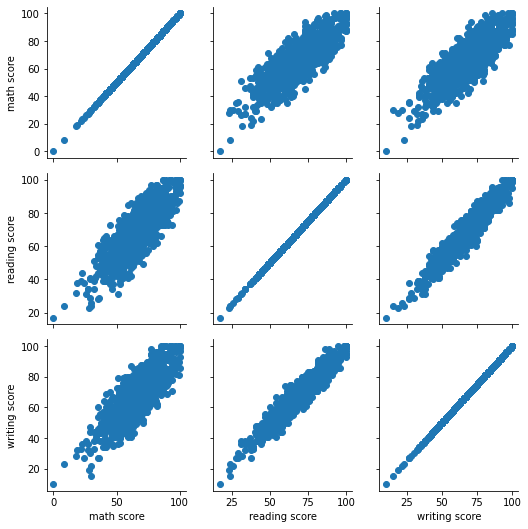

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(dataset[scores])
g.map(plt.scatter);

In [ ]:
s = ['parental level of education', 'math score', 'writing score', 'reading score']
dataset[s]

parental level of education  math score  writing score  reading score
0             bachelor's degree          72             74             72
1                  some college          69             88             90
2               master's degree          90             93             95
3            associate's degree          47             44             57
4                  some college          76             75             78
..                          ...         ...            ...            ...
995             master's degree          88             95             99
996                 high school          62             55             55
997                 high school          59             65             71
998                some college          68             77             78
999                some college          77             86             86

[1000 rows x 4 columns]

In [ ]:
dataset[s].groupby("parental level of education").mean()

math score  writing score  reading score
parental level of education                                          
associate's degree            67.882883      69.896396      70.927928
bachelor's degree             69.389831      73.381356      73.000000
high school                   62.137755      62.448980      64.704082
master's degree               69.745763      75.677966      75.372881
some college                  67.128319      68.840708      69.460177
some high school              63.497207      64.888268      66.938547

ÖDEV: Parental Level Of Education'ın notlar üzerine etkisini gösterin. Şöyle bir çıktı istiyorum:
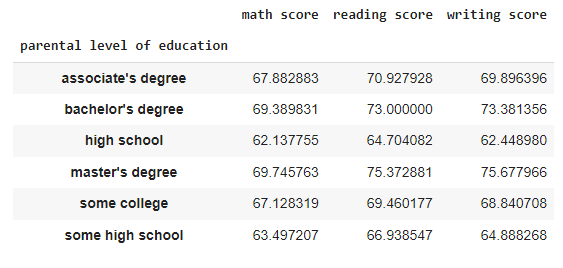

Sonrasında pandas profiling'e bakacağız